In [6]:
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

pd.set_option('display.max_columns', None)

In [130]:
train = pd.read_csv('train.csv')
original = pd.read_csv('original.csv', sep=';')
test = pd.read_csv('test.csv')

train.shape, original.shape, test.shape

((76518, 38), (4424, 37), (51012, 37))

In [3]:
train.columns

Index(['id', 'Marital status', 'Application mode', 'Application order',
       'Course', 'Daytime/evening attendance', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units

In [7]:
train.sample(3)

,id,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
22123,22123,1,1,1,9670,1,1,125.0,1,38,1,5,5,121.0,1,0,0,1,1,0,18,0,0,5,5,5,14.2,0,0,5,5,5,13.000000,0,9.4,-0.8,-3.12,Graduate
47871,47871,2,39,1,9991,0,1,133.1,1,37,37,90,90,140.0,0,0,0,1,1,0,52,0,0,5,5,0,0.0,0,0,5,5,0,0.000000,0,7.6,2.6,0.32,Dropout
51182,51182,1,1,1,9085,1,1,148.0,1,37,37,5,90,139.9,0,0,0,1,0,0,18,0,0,5,6,5,12.8,0,0,5,7,5,13.285714,0,7.6,2.6,0.32,Graduate


In [8]:
print('Feature - Unique Count')
for col in train.columns:
    print(f'{col} - {train[col].nunique()}')

Feature - Unique Count
id - 76518
Marital status - 6
Application mode - 22
Application order - 8
Course - 19
Daytime/evening attendance - 2
Previous qualification - 21
Previous qualification (grade) - 110
Nacionality - 18
Mother's qualification - 35
Father's qualification - 39
Mother's occupation - 40
Father's occupation - 56
Admission grade - 668
Displaced - 2
Educational special needs - 2
Debtor - 2
Tuition fees up to date - 2
Gender - 2
Scholarship holder - 2
Age at enrollment - 46
International - 2
Curricular units 1st sem (credited) - 21
Curricular units 1st sem (enrolled) - 24
Curricular units 1st sem (evaluations) - 36
Curricular units 1st sem (approved) - 23
Curricular units 1st sem (grade) - 1206
Curricular units 1st sem (without evaluations) - 12
Curricular units 2nd sem (credited) - 20
Curricular units 2nd sem (enrolled) - 22
Curricular units 2nd sem (evaluations) - 31
Curricular units 2nd sem (approved) - 21
Curricular units 2nd sem (grade) - 1234
Curricular units 2nd sem (

In [9]:
print('Feature - Unique Count')
for col in test.columns:
    print(f'{col} - {test[col].nunique()}')

Feature - Unique Count
id - 51012
Marital status - 6
Application mode - 20
Application order - 8
Course - 21
Daytime/evening attendance - 2
Previous qualification - 20
Previous qualification (grade) - 108
Nacionality - 18
Mother's qualification - 32
Father's qualification - 36
Mother's occupation - 38
Father's occupation - 49
Admission grade - 653
Displaced - 2
Educational special needs - 2
Debtor - 2
Tuition fees up to date - 2
Gender - 2
Scholarship holder - 2
Age at enrollment - 46
International - 2
Curricular units 1st sem (credited) - 21
Curricular units 1st sem (enrolled) - 23
Curricular units 1st sem (evaluations) - 34
Curricular units 1st sem (approved) - 23
Curricular units 1st sem (grade) - 1121
Curricular units 1st sem (without evaluations) - 11
Curricular units 2nd sem (credited) - 19
Curricular units 2nd sem (enrolled) - 23
Curricular units 2nd sem (evaluations) - 30
Curricular units 2nd sem (approved) - 21
Curricular units 2nd sem (grade) - 1155
Curricular units 2nd sem (

- Check features I suspect to be categorical. Inspect the values between train and test

In [ ]:
# Confirmed categorical_features ['Marital status', 'Application mode', 'Application order', 'Course', ''Daytime/evening attendance', 'Previous qualification', 'Nacionality', "Mother's qualification", "Father's qualification", "Mother's occupation", "Father's occupation", "Displaced", "Educational special needs", "Debtor", "Tuition fees up to date", "Gender", "Scholarship holder", "International",]

# Not sure if they are really categorical but their values seem categorical. 
# More experiements to be done
# not_sure_cat = ["Age at enrollment", "Curricular units 1st sem (credited)", "Curricular units 1st sem (enrolled)", "Curricular units 1st sem (evaluations)", "Curricular units 1st sem (approved)", "Curricular units 1st sem (without evaluations)", "Curricular units 2nd sem (credited)", "Curricular units 2nd sem (enrolled)", "Curricular units 2nd sem (evaluations)", "Curricular units 2nd sem (approved)", "Curricular units 2nd sem (without evaluations)", "Unemployment rate", "Inflation rate", "GDP"]

In [121]:
train["GDP"].sort_values().unique(), test["GDP"].sort_values().unique()

(array([-4.06, -3.12, -1.7 , -0.92,  0.32,  0.74,  0.79,  1.74,  1.79,
         2.02,  3.51]),
 array([-4.06, -3.12, -1.7 , -0.92,  0.32,  0.79,  1.74,  1.79,  2.02,
         3.51]))

In [15]:
train['Application mode'].sort_values().unique(), test['Application mode'].sort_values().unique()

# Train has 4, 9, 12, 26 and test does not
# Test has 14, 19 and train does not

# 4, 9, 12, 14, 16 and 19 appear just once in their respective datasets and are not in the original dataset (possible synthetic data hallucination)
# Possibly drop the 4 rows in the training to see effect on the score
# Change all of them to NaN by representing them with -999 in both train and test

(array([ 1,  2,  3,  4,  5,  7,  9, 10, 12, 15, 16, 17, 18, 26, 27, 35, 39,
        42, 43, 44, 51, 53], dtype=int64),
 array([ 1,  2,  3,  5,  7, 10, 14, 15, 16, 17, 18, 19, 27, 35, 39, 42, 43,
        44, 51, 53], dtype=int64))

In [32]:
train['Course'].sort_values().unique(), test['Course'].sort_values().unique()

# Train has 39, 979
# Test 2105, 4147, 7500, 9257

# All the numbers appear just once (possible synthetic dataset hallucination)
# Possibly drop all the rows in train
# Change all of them to NaN by representing them with -99999 in both train and test

(array([  33,   39,  171,  979, 8014, 9003, 9070, 9085, 9119, 9130, 9147,
        9238, 9254, 9500, 9556, 9670, 9773, 9853, 9991], dtype=int64),
 array([  33,  171, 2105, 4147, 7500, 8014, 9003, 9070, 9085, 9119, 9130,
        9147, 9238, 9254, 9257, 9500, 9556, 9670, 9773, 9853, 9991],
       dtype=int64))

In [ ]:
train['Previous qualification'].sort_values().unique(), test['Previous qualification'].sort_values().unique()

# Train has 36, 37
# Test has 16
# Both have 17 which is not in the original dataset

# All the numbers appear just once (possible synthetic dataset hallucination)
# Possibly drop all the rows in train
# Change all of them to NaN by representing them with -999 in both train and test

In [ ]:
train['Nacionality'].sort_values().unique(), test['Nacionality'].sort_values().unique()

# No 17 (Lithuanian) in test but is in train twice
# No 14 (English) in train but in  once
# Both nationalities are in the original dataset

In [ ]:
train["Mother's qualification"].sort_values().unique(), test["Mother's qualification"].sort_values().unique()

# Train has 7, 8, 15, 28
# Test has 13 (twice), 35 (twice)

# Possibly drop all the rows in train
# Change all of them to NaN by representing them with -999 in both train and test

In [ ]:
train["Father's qualification"].sort_values().unique(), test["Father's qualification"].sort_values().unique()

# Train has 15, 23, 24
# Test has 16, 28

# Possibly drop all the rows in train
# Change all of them to NaN by representing them with -999 in both train and test

In [ ]:
train["Mother's occupation"].sort_values().unique(), test["Mother's occupation"].sort_values().unique()

# Train has 11, 38, 101, 103, 127, 163, 172
# Test has 98, 133, 154, 174, 181
# Both have 124 which is not in the original dataset

# All the numbers appear just once (possible synthetic dataset hallucination)
# Possibly drop all the rows in train
# Change all of them to NaN by representing them with -999 in both train and test

In [ ]:
train["Father's occupation"].sort_values().unique(), test["Father's occupation"].sort_values().unique()

# Train has 12, 13, 19, 22, 39, 96, 148, 191
# Test has 113, 120
# Both have 11 and 125 which are not in the original dataset

# All the numbers appear just once (possible synthetic dataset hallucination)
# Possibly drop all the rows in train
# Change all of them to NaN by representing them with -999 in both train and test

In [ ]:
# Check where Curricular units 1st sem (credited) is greater than Curricular units 1st sem (enrolled). It should not be possible
# Check where Curricular units 1st sem (approved) is greater than Curricular units 1st sem (enrolled). It should not be possible
# Check where Curricular units 1st sem (credited) is greater than Curricular units 1st sem (approved). It should not be possible
# Check where Curricular units 2nd sem (credited) is greater than Curricular units 2nd sem (enrolled). It should not be possible
# Check where Curricular units 2nd sem (approved) is greater than Curricular units 2nd sem (enrolled). It should not be possible
# Check where Curricular units 2nd sem (credited) is greater than Curricular units 2nd sem (approved). It should not be possible

In [ ]:
# Unemployment rate has continous values but is actually categorical (although to make this work 10.83333 in training will be capped at 10.8)
# Inflation rate has continous values but is actually categorical in nature
# GDP has continous values but is actually categorical in nature
# Can Inflation rate and GDP be negative?

In [122]:
TARGET = 'Target'

train[f'{TARGET}'].sort_values().nunique()

3

In [123]:
# Get value counts
value_counts = train[TARGET].value_counts()

# Calculate unique value percentages in training data
percentages = (value_counts / len(train[TARGET])) * 100
percentages

Target
Graduate    47.416294
Dropout     33.058888
Enrolled    19.524818
Name: count, dtype: float64

In [124]:
def plot_distribution_pairs(train, test, feature, hue="set", palette=None):
    data_df = train.copy()
    data_df['set'] = 'train'
    data_df = pd.concat([data_df, test.copy()]).fillna('original')
    data_df.replace([np.inf, -np.inf], np.nan, inplace=True)
    # data_df = data_df

    f, axes = plt.subplots(1, 2, figsize=(14, 6))
    for i, s in enumerate(data_df[hue].unique()):
        selection = data_df.loc[data_df[hue]==s, feature]
        # Filter 'selection' to include only the central 95% of the data
        q_01, q_99 = np.percentile(selection, [1, 99])
        selection_filtered = selection[(selection >= q_01) & (selection <= q_99)]
        with warnings.catch_warnings():
            warnings.simplefilter("ignore", category=FutureWarning)
            # sns.histplot(selection_filtered, color=palette[i], ax=axes[0], label=s)
            selection_filtered_np = selection_filtered.to_numpy()
            sns.kdeplot(selection_filtered_np, fill=True, ax=axes[0], label=s, alpha=0.2)
            sns.boxplot(x=hue, y=feature, data=data_df, palette=palette, ax=axes[1])
    axes[0].set_title(f"Paired train/test distributions of {feature}")
    axes[1].set_title(f"Paired train/test boxplots of {feature}")
    axes[0].legend()
    axes[1].legend()
    plt.show()

color_list = ["#A5D7E8", "#576CBC", "#19376D", "#0B2447"]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


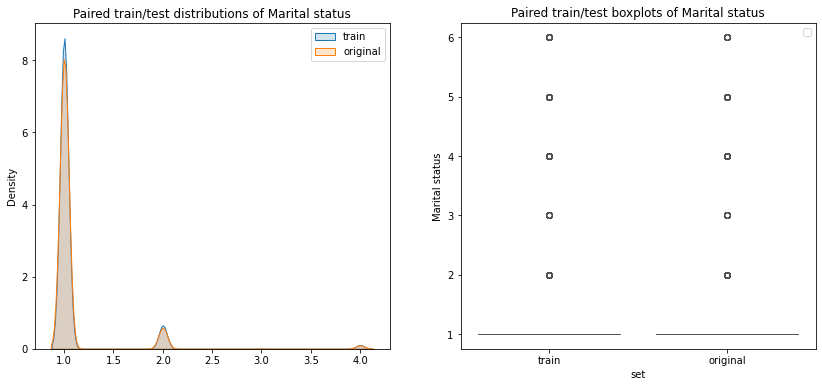

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


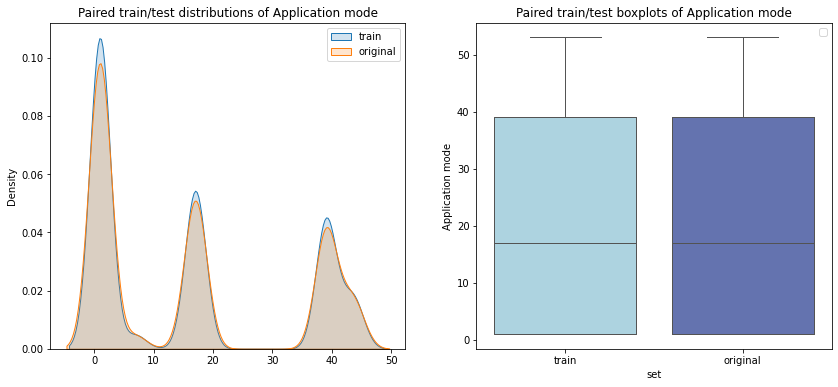

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


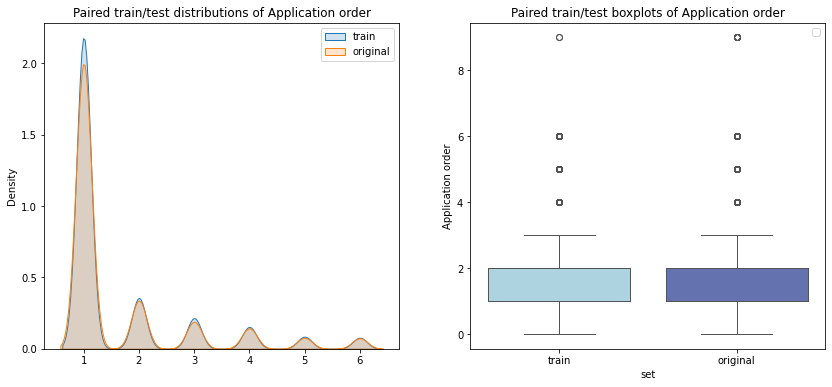

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


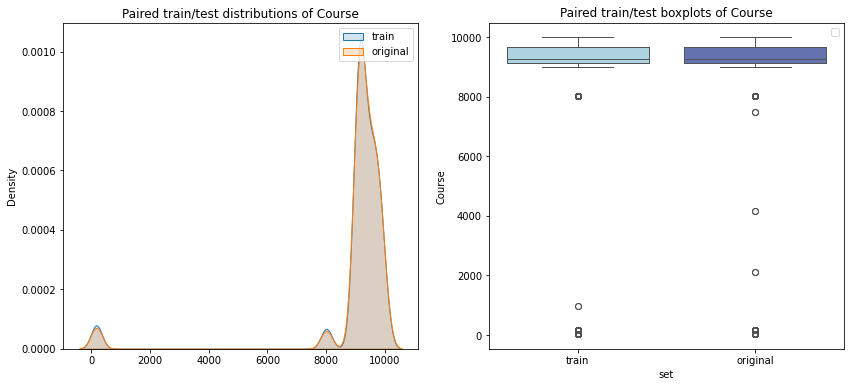

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


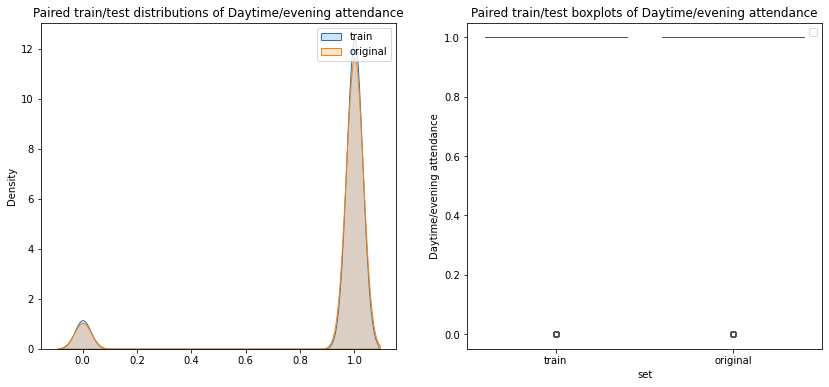

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


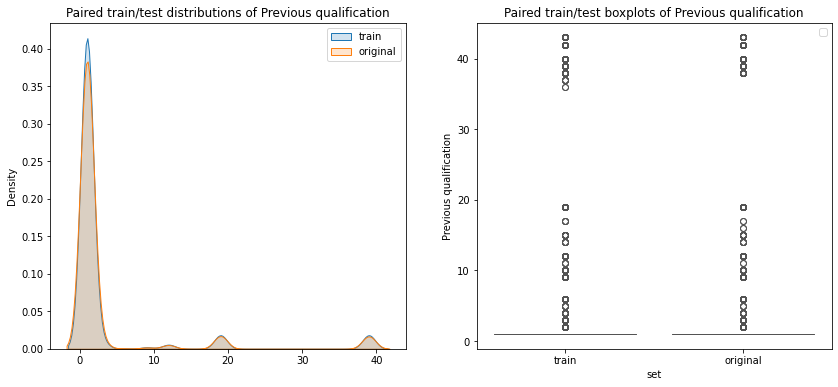

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


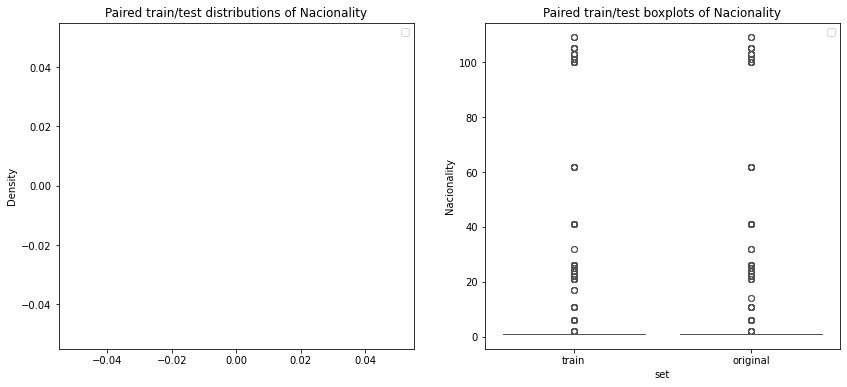

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


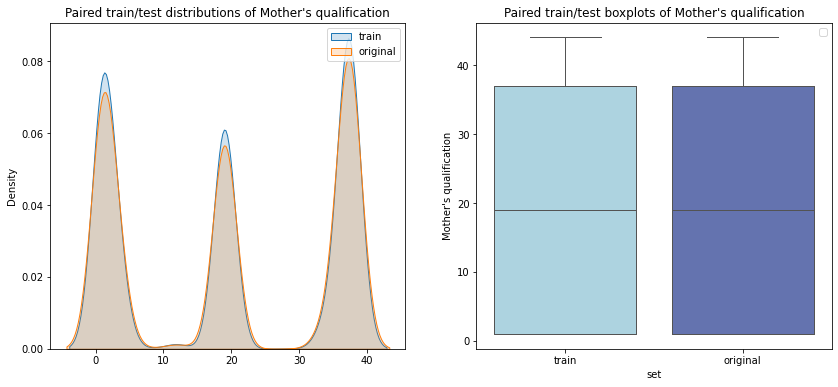

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


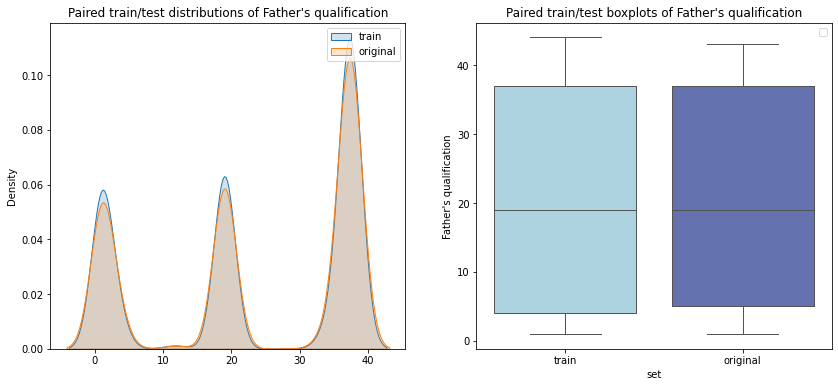

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


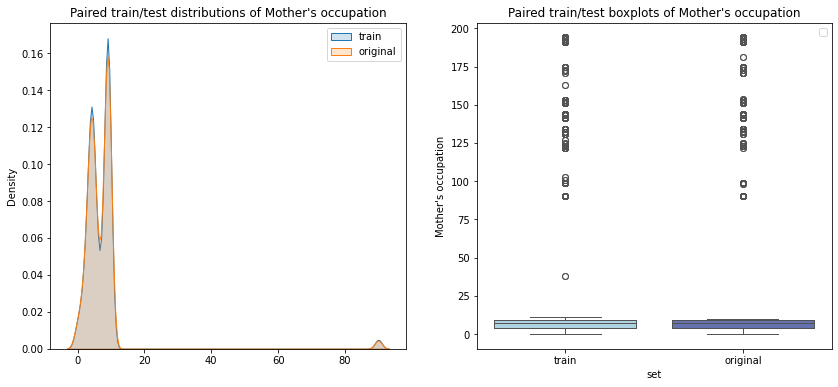

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


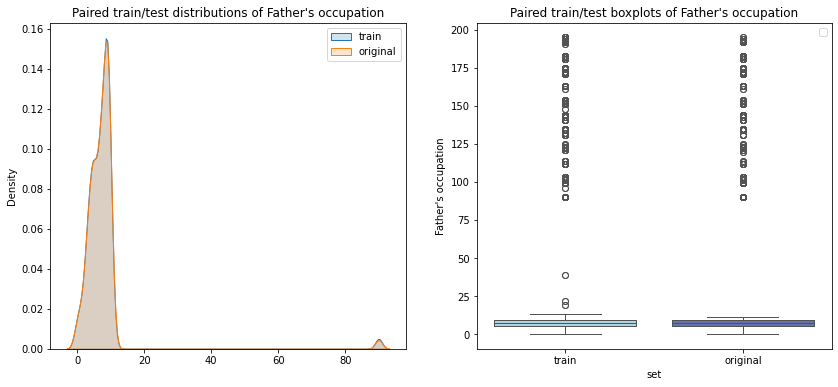

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


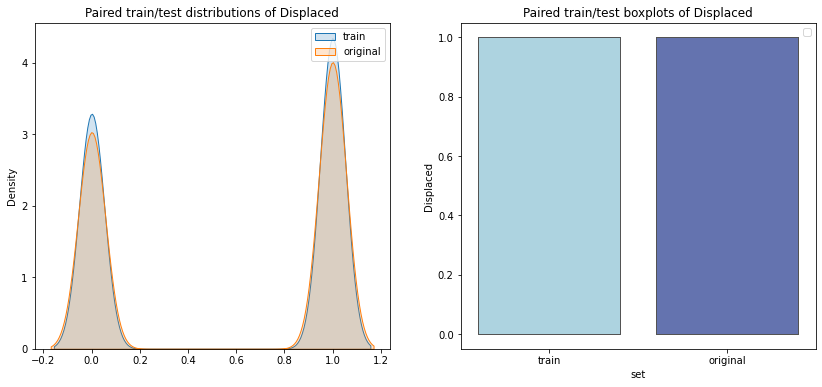

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


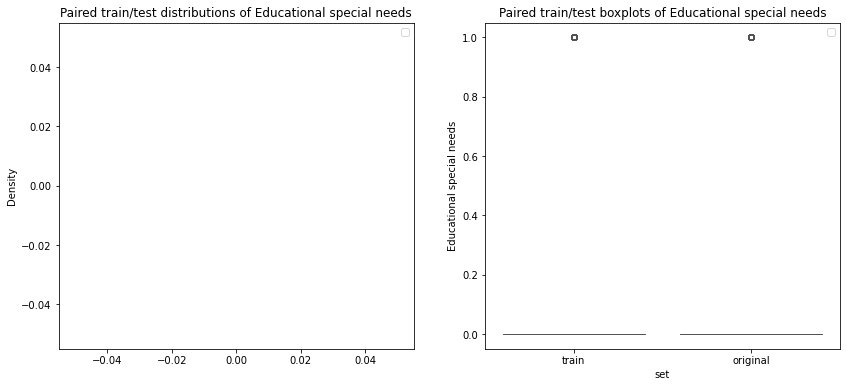

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


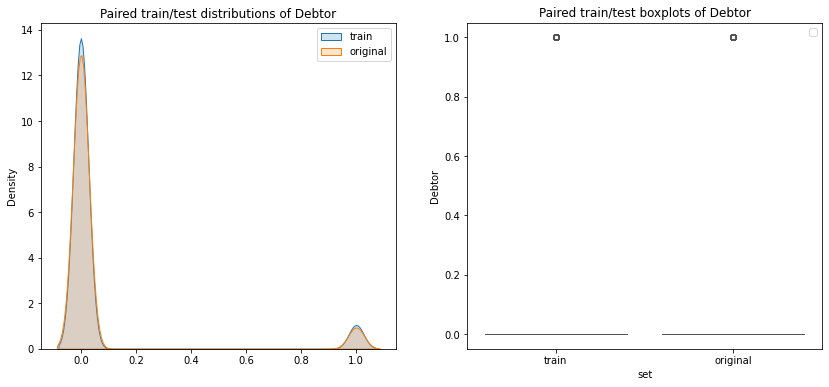

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


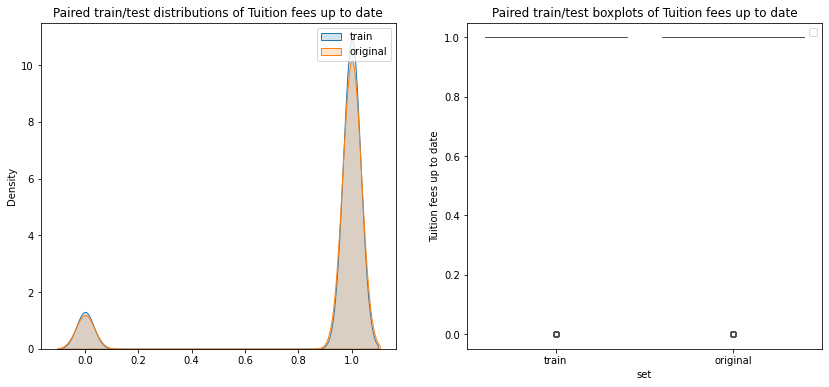

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


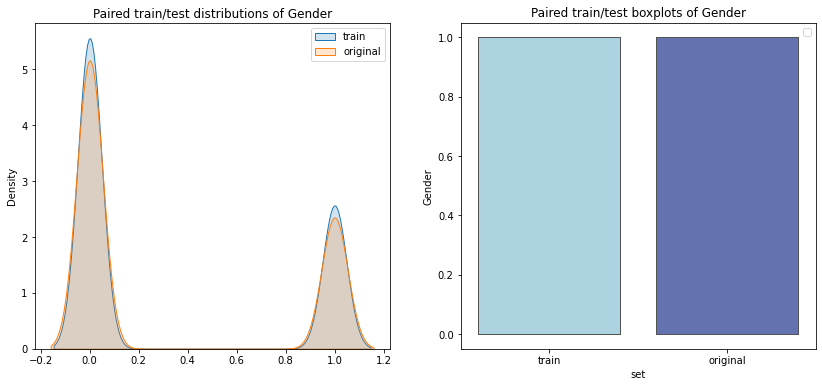

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


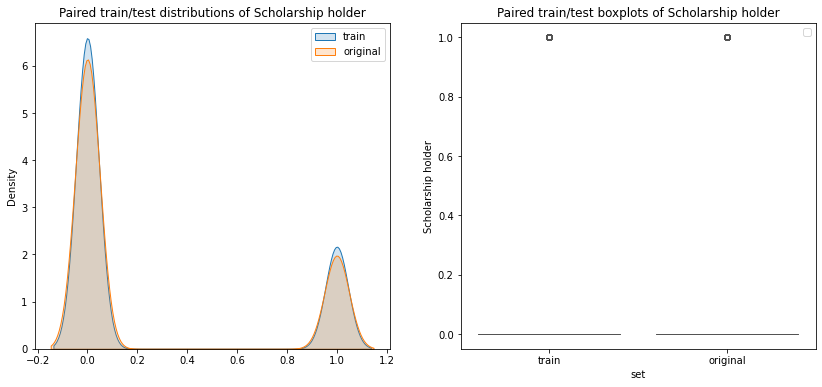

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


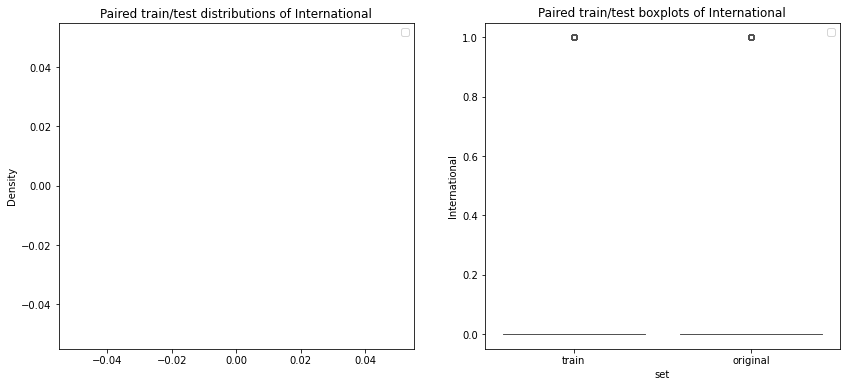

In [125]:
cat_feats = ["Marital status", "Application mode", "Application order", "Course", "Daytime/evening attendance", "Previous qualification", "Nacionality", "Mother's qualification", "Father's qualification", "Mother's occupation", "Father's occupation", "Displaced", "Educational special needs", "Debtor", "Tuition fees up to date", "Gender", "Scholarship holder", "International",]

# for feature in train.columns:
for feature in cat_feats:
    plot_distribution_pairs(train, test, feature, palette=color_list)

- The features have the same distribution in both train and test.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


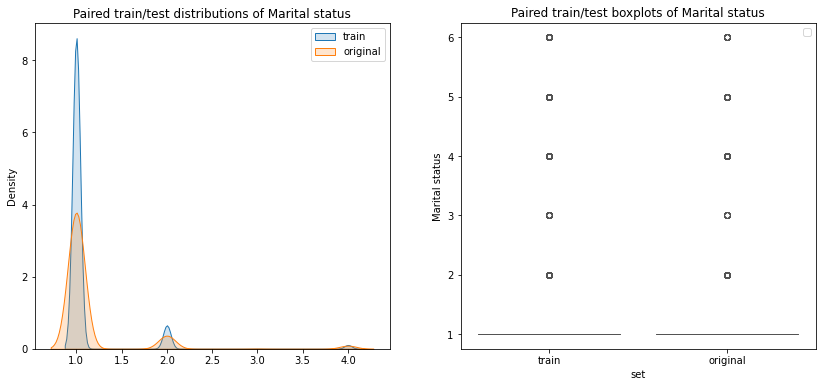

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


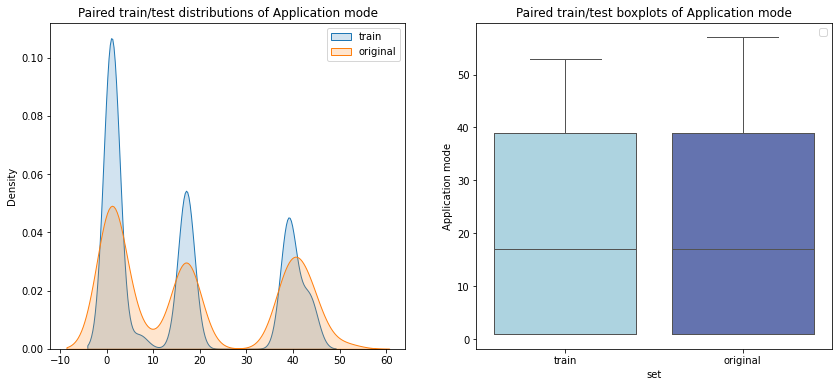

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


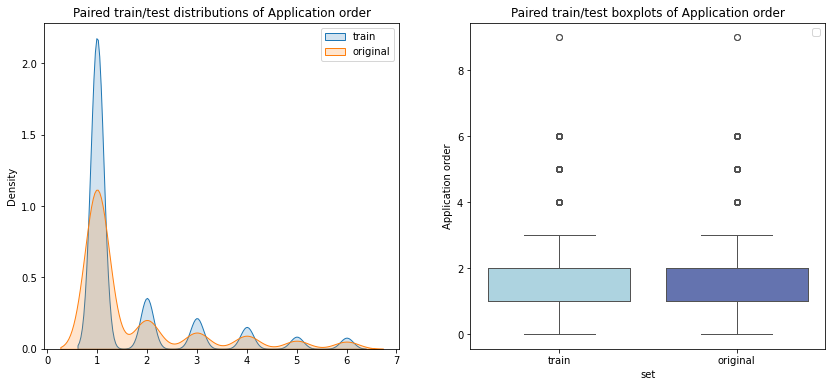

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


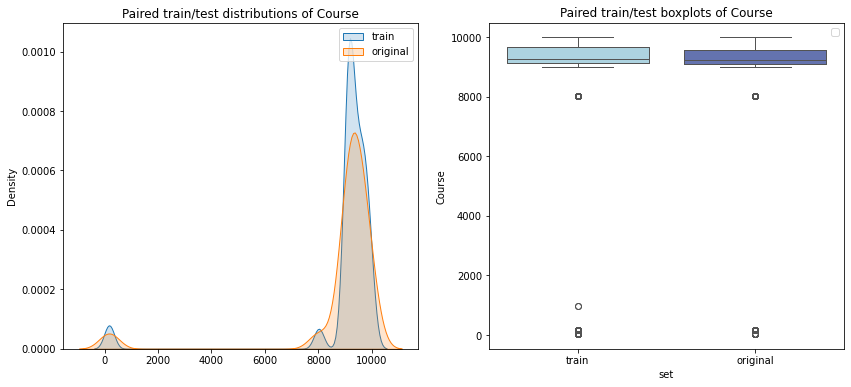

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


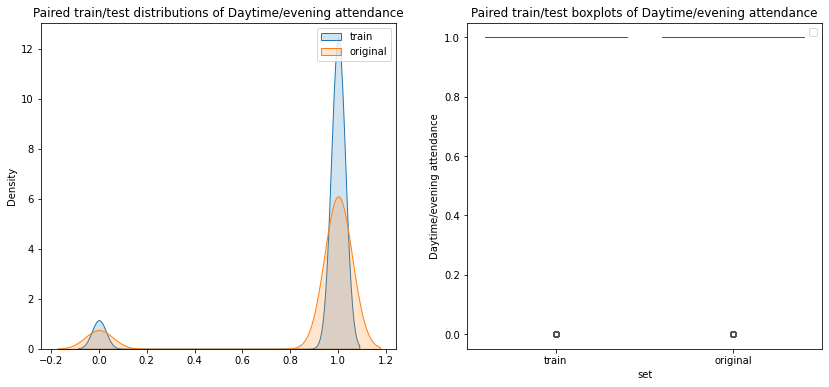

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


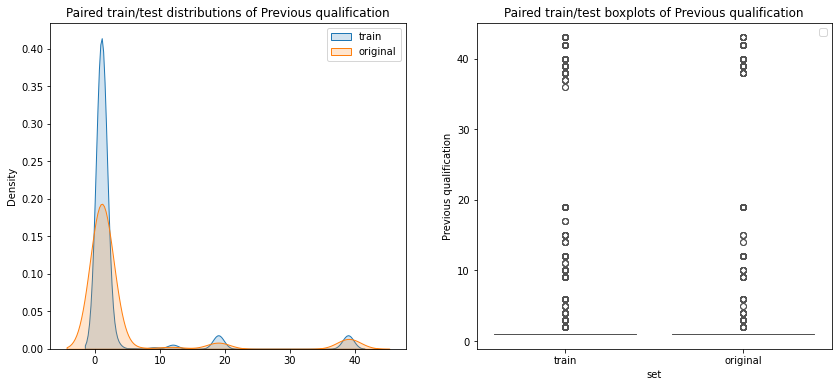

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


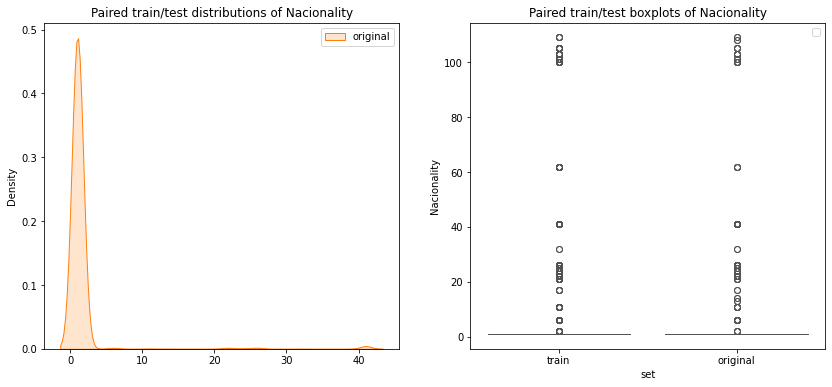

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


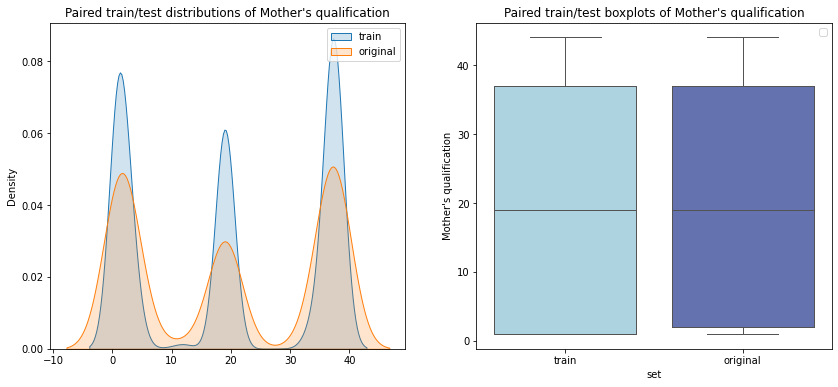

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


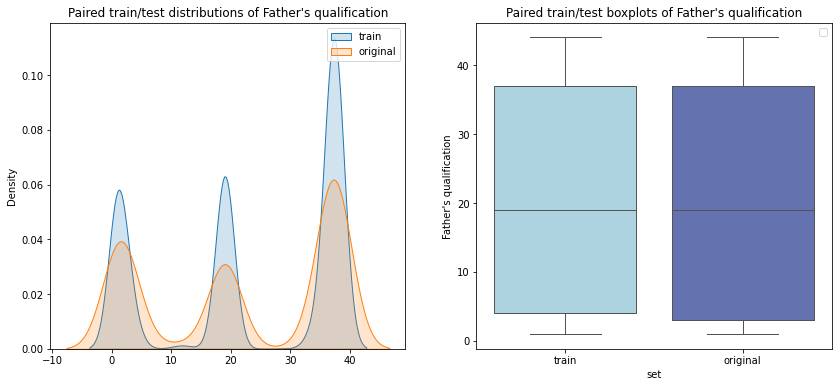

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


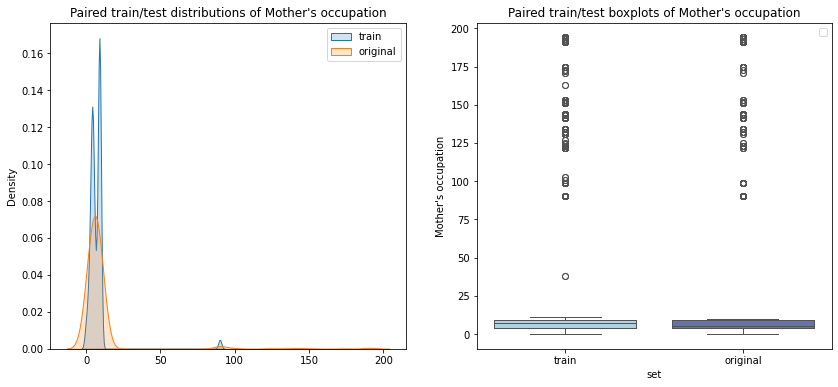

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


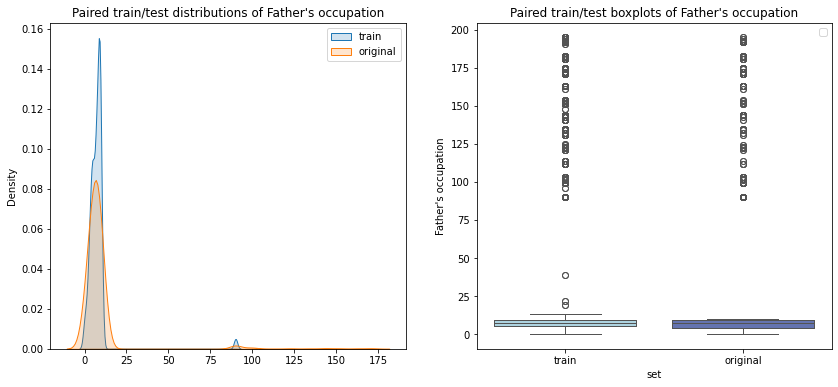

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


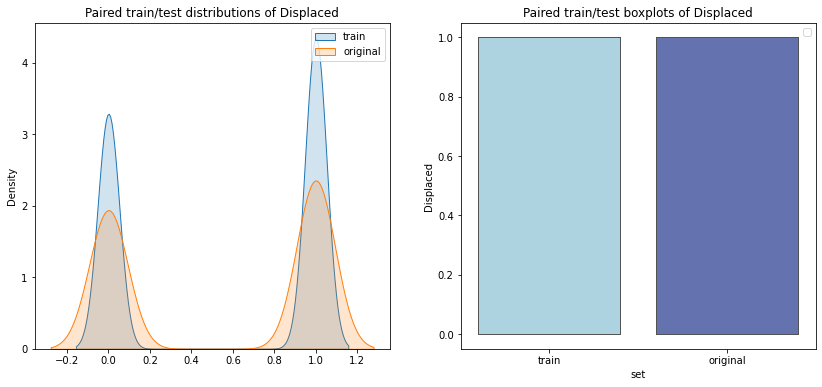

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


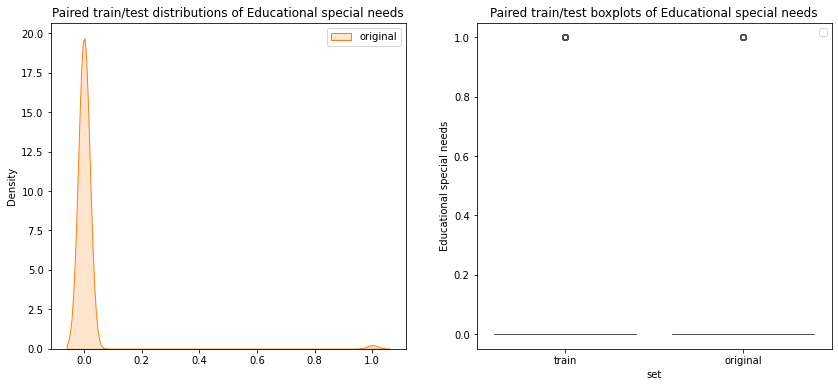

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


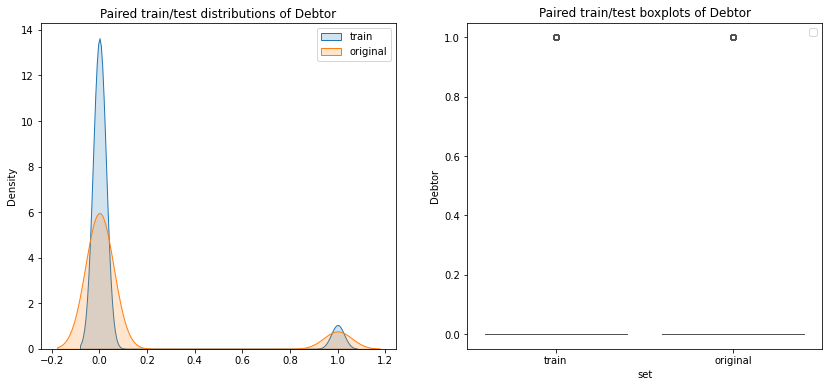

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


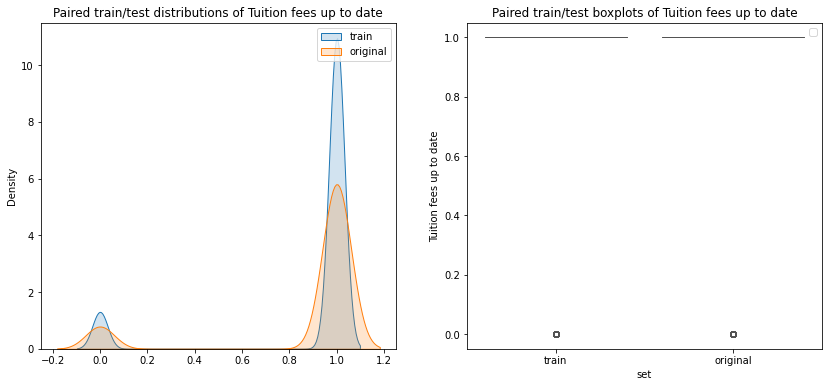

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


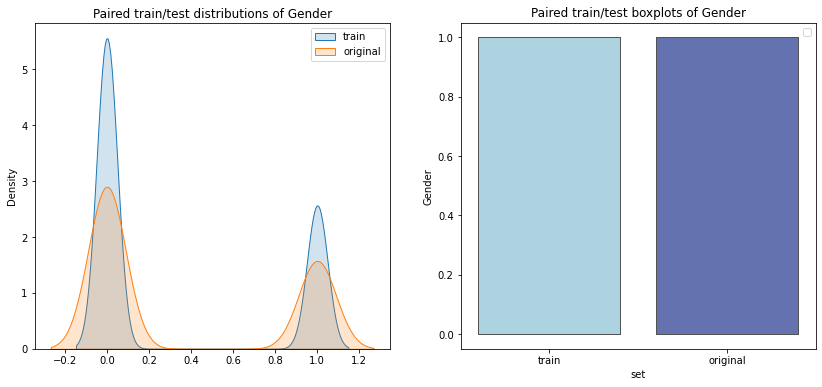

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


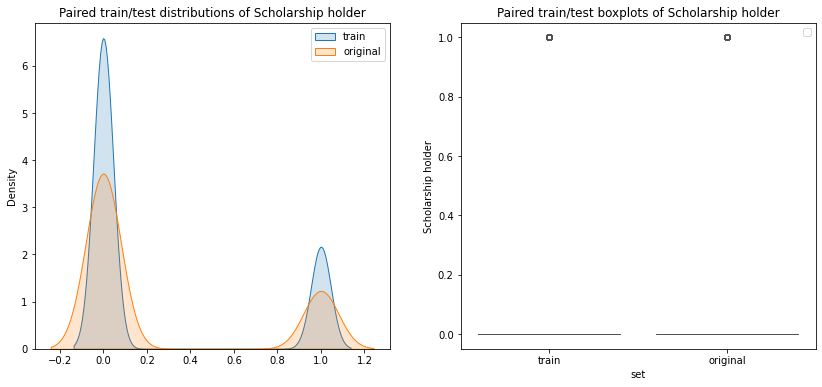

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


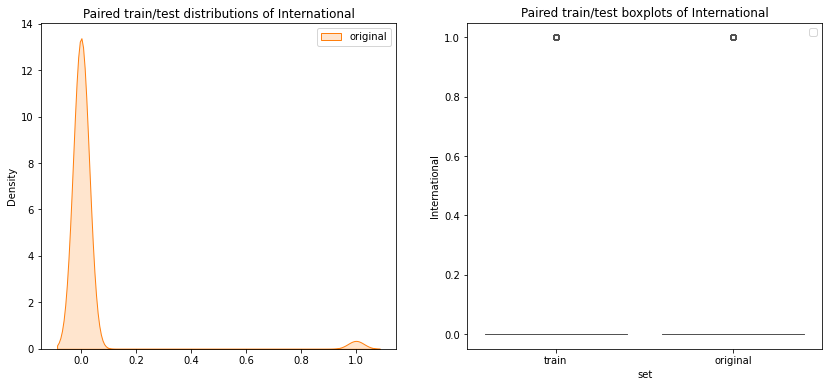

In [131]:
cat_feats = ["Marital status", "Application mode", "Application order", "Course", "Daytime/evening attendance", "Previous qualification", "Nacionality", "Mother's qualification", "Father's qualification", "Mother's occupation", "Father's occupation", "Displaced", "Educational special needs", "Debtor", "Tuition fees up to date", "Gender", "Scholarship holder", "International",]

# for feature in train.columns:
for feature in cat_feats:
    plot_distribution_pairs(train, original, feature, palette=color_list)

- The distribution between the train and original datasets are the similar enough. It is to check if adding it improves the score